In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
#reading stock data
combined_5min = pd.read_csv('./out_data/Stock output folder/combined_5min_stockdata.csv')

In [3]:
combined_5min.head()

,DateTime,BBY_Close,FCFS_Close,IWM_Close,ODP_Close,SPX_Close,GME_Close,BBY_5min_return,FCFS_5min_return,IWM_5min_return,ODP_5min_return,SPX_5min_return,GME_5min_return
0,2020-12-15 09:30:00,88.4245,67.1836,181.5828,27.13,3674.65,3.2088,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-12-15 09:35:00,88.3557,67.8940,181.6779,27.06,3676.10,3.2325,-0.000778,0.010574,0.000524,-0.002580,0.000395,0.007386
2,2020-12-15 09:40:00,88.0374,67.9603,181.4592,27.13,3672.81,3.1975,-0.003602,0.000977,-0.001204,0.002587,-0.000895,-0.010828
3,2020-12-15 09:45:00,88.1836,67.8940,181.3927,27.13,3672.11,3.1715,0.001661,-0.000976,-0.000366,0.000000,-0.000191,-0.008131
4,2020-12-15 09:50:00,88.0331,68.1592,181.7708,27.10,3673.21,3.1600,-0.001707,0.003906,0.002084,-0.001106,0.000300,-0.003626


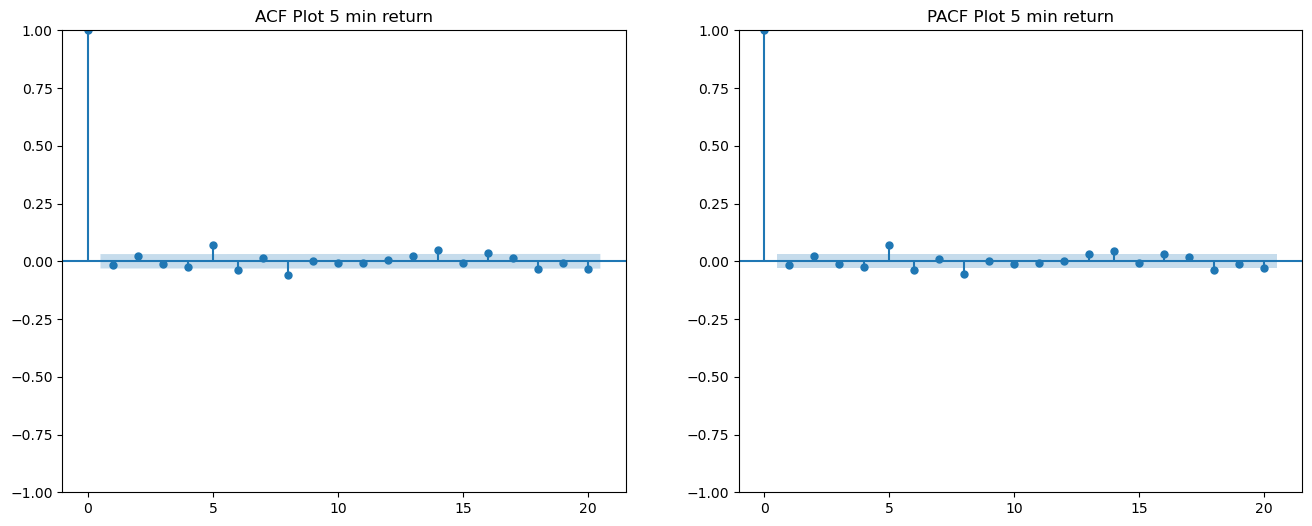

In [4]:
#Plot ACF and PACF to visualize the optimal lag

GME_5min_return = combined_5min['GME_5min_return'].dropna()
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# ACF plot (autocorrelation)
plot_acf(GME_5min_return, ax=axes[0], lags=20)
axes[0].set_title('ACF Plot 5 min return')

# PACF plot (partial autocorrelation)
plot_pacf(GME_5min_return, ax=axes[1], lags=20, method='ywm')
axes[1].set_title('PACF Plot 5 min return')

plt.show()

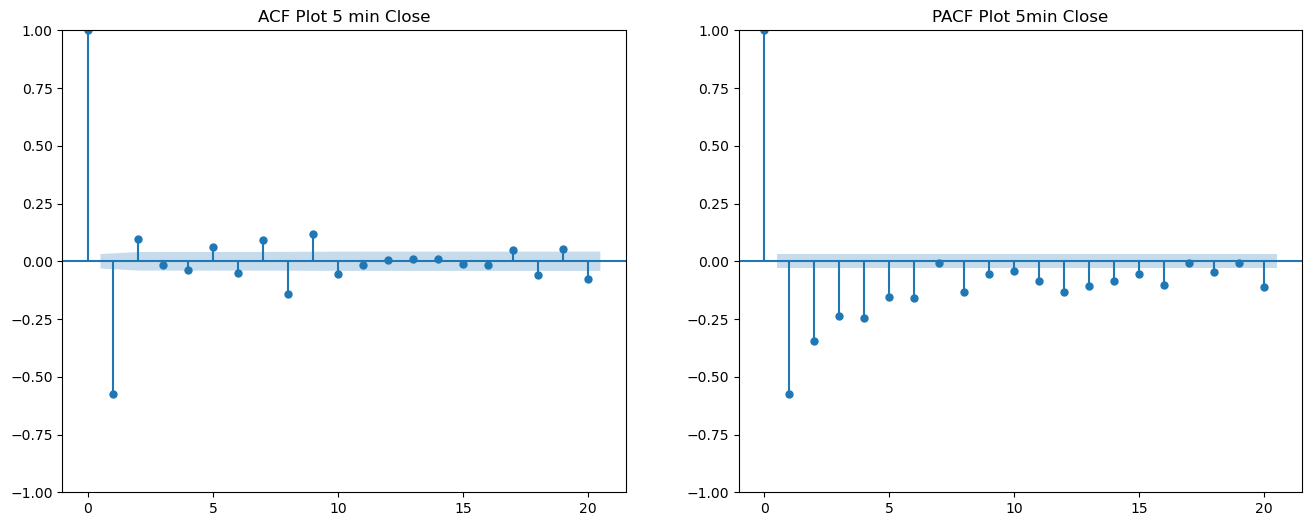

In [19]:
#Plot ACF and PACF to visualize the optimal lag
#first differencing close 
combined_5min_close = combined_5min['GME_Close'] - combined_5min['GME_Close'].shift(1)
combined_5min_close = combined_5min_close.dropna()
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# ACF plot (autocorrelation)
plot_acf(combined_5min_close, ax=axes[0], lags=20)
axes[0].set_title('ACF Plot 5 min Close')

# PACF plot (partial autocorrelation)
plot_pacf(combined_5min_close, ax=axes[1], lags=20, method='ywm')
axes[1].set_title('PACF Plot 5min Close')

plt.show()

#we can see lag = 5 is optimal

In [7]:
#doing same for daily data 
GME_daily = pd.read_csv('./out_data/Stock output folder/GME_daily_stockdata.csv')
GME_daily = GME_daily.dropna()
GME_daily.head()

,DateTime,Close,Return
1,2020-12-16,3.4625,0.000000
2,2020-12-17,3.7075,0.070758
3,2020-12-18,3.9075,0.053945
4,2020-12-21,3.8825,-0.006398
5,2020-12-22,4.8650,0.253059


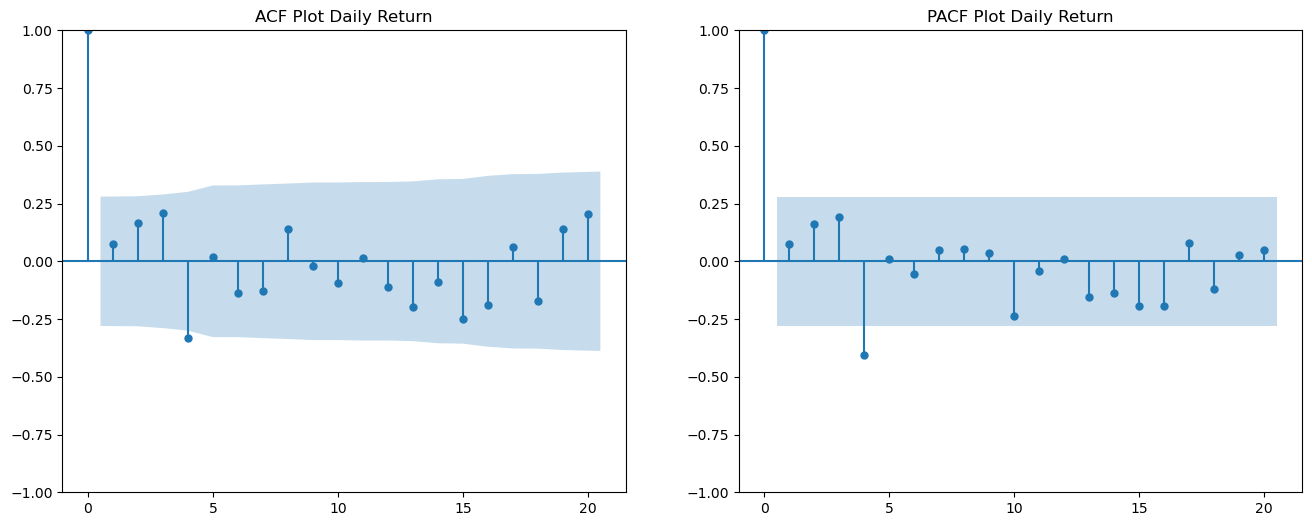

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# ACF plot (autocorrelation)
plot_acf(GME_daily['Return'], ax=axes[0], lags=20)
axes[0].set_title('ACF Plot Daily Return')

# PACF plot (partial autocorrelation)
plot_pacf(GME_daily['Return'], ax=axes[1], lags=20, method='ywm')
axes[1].set_title('PACF Plot Daily Return')

plt.show()

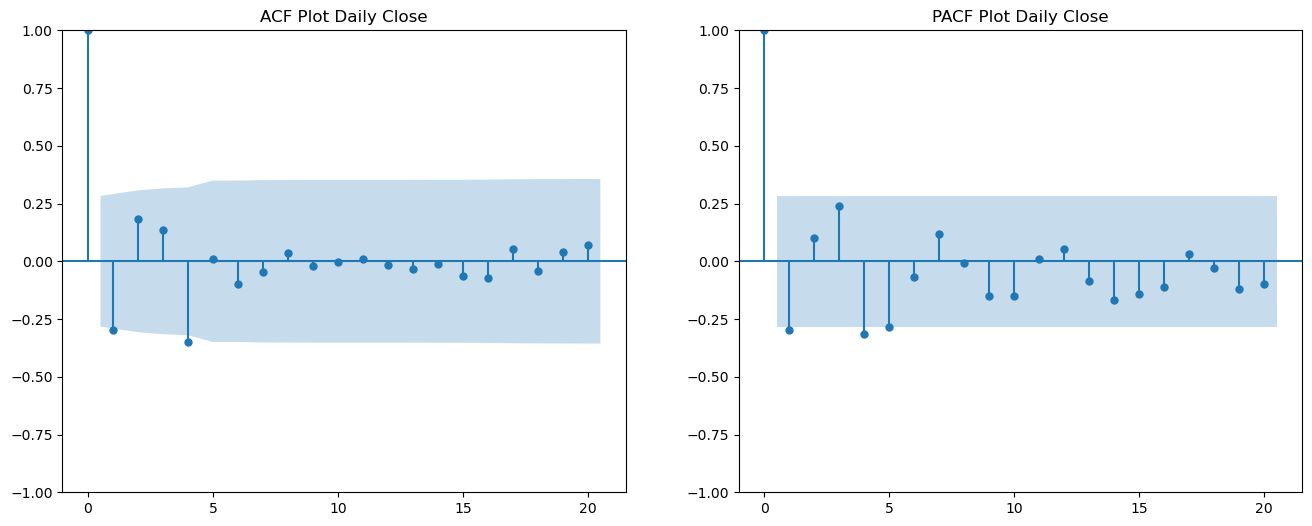

In [9]:
#first differencing close 
GME_daily['Close'] = GME_daily['Close'] - GME_daily['Close'].shift(1)
GME_daily = GME_daily.dropna()
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
# ACF plot (autocorrelation)
plot_acf(GME_daily['Close'], ax=axes[0], lags=20)
axes[0].set_title('ACF Plot Daily Close')

# PACF plot (partial autocorrelation)
plot_pacf(GME_daily['Close'], ax=axes[1], lags=20, method='ywm')
axes[1].set_title('PACF Plot Daily Close')

plt.show()